#### Code Organisation
1. Import libraries
2. Load dataset
3. Data analysis and observations
4. Data preprocessing based on observations

In [1]:
# setup, load dataset and imports
# reading image fails with opencv, using Pillow

import os
import pandas as pd
import numpy as np
from PIL import Image
import collections

import matplotlib.pyplot as plt

seed=1234

IMAGE = 'image'
EMOTION = 'emotion'
DATASET = '../facial_expressions/'
images_path = DATASET + 'images'
csv_path = DATASET + '/data/legend.csv'

legend = pd.read_csv(csv_path)

In [2]:
# data analysis and observations

print(f'Initial data classes: {legend[EMOTION].unique()}')
legend[EMOTION] = legend[EMOTION].str.upper()
print(f'final classes after equalising: {legend[EMOTION].unique()}')

X_an = []
shapes = set()

mins = []
maxs = []
shapes = []
i = 0

for _, row in legend.iterrows():
    image_file = row[IMAGE]
    img_path = os.path.join(images_path, image_file)
    
    with Image.open(img_path) as img:
        img_array = np.array(img)
        mins.append(img_array.min())
        maxs.append(img_array.max())
        i+=1
        shapes.append(img_array.shape)


print(len(shapes), shapes)

#plt.hist(mins)
#plt.hist(maxs)
#plt.hist(shapes)


Initial data classes: ['anger' 'surprise' 'disgust' 'fear' 'neutral' 'happiness' 'sadness'
 'contempt' 'NEUTRAL' 'SADNESS' 'DISGUST' 'FEAR' 'SURPRISE' 'ANGER'
 'HAPPINESS']
final classes after equalising: ['ANGER' 'SURPRISE' 'DISGUST' 'FEAR' 'NEUTRAL' 'HAPPINESS' 'SADNESS'
 'CONTEMPT']
13690 [(536, 347, 3), (536, 355, 3), (536, 355, 3), (536, 356, 3), (350, 350), (350, 350), (350, 350), (350, 350), (350, 350), (350, 350), (350, 350), (350, 350), (350, 350), (350, 350), (350, 350), (350, 350), (350, 350), (350, 350), (350, 350), (350, 350), (350, 350), (350, 350), (350, 350), (350, 350), (350, 350), (350, 350), (350, 350), (350, 350), (350, 350), (350, 350), (350, 350), (350, 350), (350, 350), (350, 350), (350, 350), (350, 350), (350, 350), (350, 350), (350, 350), (350, 350), (350, 350), (350, 350), (350, 350), (350, 350), (350, 350), (350, 350), (350, 350), (350, 350), (350, 350), (350, 350), (350, 350), (350, 350), (350, 350), (350, 350), (350, 350), (350, 350), (350, 350), (350, 350)

In [3]:
# data loading

# 1. data is being grayscaled
# 2. resized to (150,150) before loading
# 3. normalisation to be done for each model differently, might need to move resizing as well

# convert classes to 7
legend[EMOTION] = legend[EMOTION].str.upper()
print(f'final classes after equalising: {legend[EMOTION].unique()}')

# Create class map (unique class labels mapped to indices)
classes = legend[EMOTION].unique()
classMap = {i: class_name for i, class_name in enumerate(classes)}


# Add numeric labels to the dataframe
class_to_index = {class_name: i for i, class_name in enumerate(classes)}
legend['class_index'] = legend[EMOTION].map(class_to_index)


X = []
y = []


for _, row in legend.iterrows():
    image_file = row[IMAGE]
    class_index = row['class_index']
    
    img_path = os.path.join(images_path, image_file)
    
    with Image.open(img_path) as img:
        # convert to grayscale
        img = img.convert('L')

        # resize 
        img = img.resize((150,150), Image.Resampling.BOX)
        img_array = np.array(img)
        X.append(img_array)
        y.append(class_index)
            


# int or float?
X = np.array(X)
y = np.array(y)



print(f"ClassMap: {classMap}")


final classes after equalising: ['ANGER' 'SURPRISE' 'DISGUST' 'FEAR' 'NEUTRAL' 'HAPPINESS' 'SADNESS'
 'CONTEMPT']
ClassMap: {0: 'ANGER', 1: 'SURPRISE', 2: 'DISGUST', 3: 'FEAR', 4: 'NEUTRAL', 5: 'HAPPINESS', 6: 'SADNESS', 7: 'CONTEMPT'}


[[199 199 199 ... 190 191 191]
 [198 198 198 ... 191 191 192]
 [198 198 198 ... 191 191 191]
 ...
 [ 48  40  36 ...  67  66  68]
 [ 51  40  35 ...  61  64  65]
 [ 47  40  37 ...  62  65  65]]


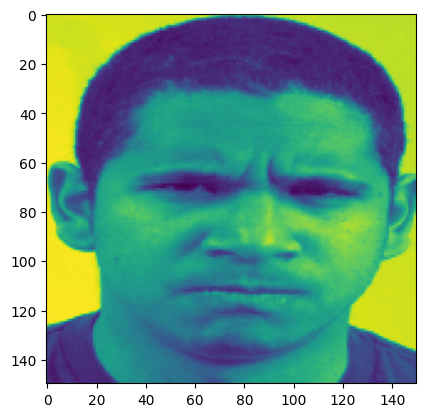

In [4]:
# display images for happiness

print(X[0])
plt.imshow(X[0])

### CNN approach